In [1]:
cd("/Users/elfflorin/Documents/Projects/julia.hw/jpie");
using Lexicon;
using brml;


Available Demos:

demoBurglar.jl
demoBurglarDictPot.jl
demoBurglarSimple.jl
demoChainIndepRational.jl
demoHMMInferenceFG.jl
demoHMMInferenceSimple.jl
demoHMMlearn.jl
demoMaxProd.jl
demoPlotDAG.jl
demoPotLogArray.jl
demoSumProd.jl
demoSumProdStandardiseVariables.jl


INFO: Loading help data...


The domain for visible states: $V = \{1, 2\}$  <br/>
The domain for hidden states: $H = \{1, 2, 3\}$ <br/>
The number of sequences: $N = 10$
The number of timesteps per sequence: $T$

In [2]:
V = 2  # number of visible states
H = 3 # number of hidden states
N = 10 # number of sequences to analyze

10

The probabilities for the hidden variable states at timestep 1: $p(h_{1})$ 

In [3]:
ph1_true = condp(rand(H, 1)) # probabilities for the states of the hidden variable at timestep 1

3x1 Array{Float64,2}:
 0.186271
 0.522621
 0.291108

Initialize the transition matrix **$phghm \in R^{3x3}$** with
$$\begin{eqnarray}
  phghm(i, j) = p(h_t = i | h_{t-1} = j) \\
  \sum_{i = 1}^{3} phghm(i, j) = 1
 \end{eqnarray}
$$

In [4]:
phghm_true = condp(rand(H, H)) # transition matrix with sum(phghm, 1) = 1 with phghm[i, j] = p(hg=i | hm=j), hg@t, hm@t-1

3x3 Array{Float64,2}:
 0.284357  0.308212  0.326852
 0.312299  0.423563  0.351961
 0.403344  0.268225  0.321186

Initialize the emission matrix **$pvgh \in R^{2x3}$** with
$$\begin{eqnarray}
  pvgh(i, j) = p(v_t = i | h_{t} = j) \\
  \sum_{i = 1}^{2} pvgh(i, j) = 1
 \end{eqnarray}
$$

In [5]:
pvgh_true = condp((rand(V, H))) # emision matrix with sum(pvgh, 1) = 1 with pvgh[i, j] = p(vg = i | h = j), vg@t h@t

2x3 Array{Float64,2}:
 0.723444  0.500703  0.0984932
 0.276556  0.499297  0.901507 

In [6]:
# generate training data
h = cell(N) # array with several hidden states sequences of various lengths
v = cell(N) # array with corresponding visible states sequences; type: Array{Any,1}
T = zeros(Int, N) # vector with number of timesteps per sequence

# generate N sequence pairs of hidden and visible states
for n = 1:N
    T[n] = 20 + ceil(10 * rand()) # length in timesteps of the current sequence
    # initialize the current sequences
    h[n] = zeros(Int, T[n])  # type: Array{Int64,1}
    v[n] = zeros(Int, T[n])
    
    # populate the current sequences with random states based on transition and emission probabilities
    h[n][1] = randgen(ph1_true)
    v[n][1] = randgen(pvgh_true[:, h[n][1]])
    for t = 2:T[n]
        h[n][t] = randgen(phghm_true[:, h[n][t - 1]])        
        v[n][t] = randgen(pvgh_true[:, h[n][t]])      
    end
end

In [7]:
# EM algorithm (see if we can recover the true HMM parameters):
# random initialisation:
phghm, ph1, pvgh, loglik = HMMem(v, H, V, MaxIterations=30)

(
3x3 Array{Float64,2}:
 0.103016  0.529734   0.17888 
 0.6473    0.392699   0.319864
 0.249684  0.0775671  0.501256,

3x1 Array{Float64,2}:
 0.152555
 0.260492
 0.586953,

2x3 Array{Float64,2}:
 0.147157  0.541657  0.493501
 0.852843  0.458343  0.506499,

-14.73890397269741)

In [8]:
# get sorting indices for initial probabilities
hord_true = sortperm(ph1_true[:,1])
hord = sortperm(ph1[:,1])

3-element Array{Int64,1}:
 1
 2
 3

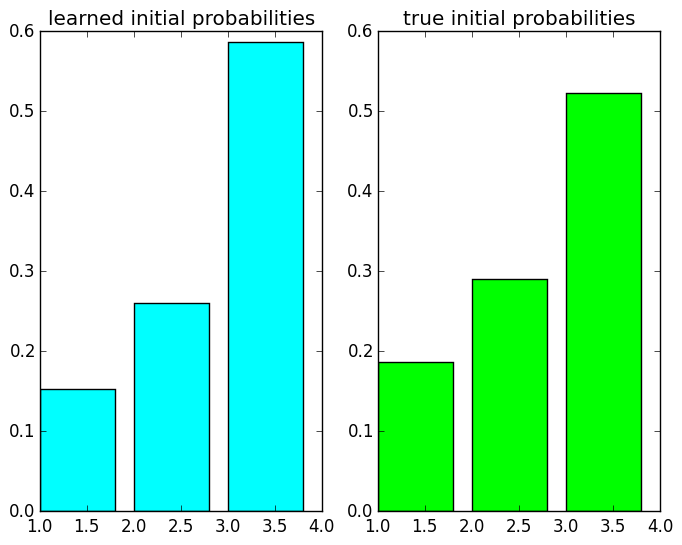

(PyObject <matplotlib.patches.Rectangle object at 0x10a2f3110>,PyObject <matplotlib.patches.Rectangle object at 0x10a2f3750>,PyObject <matplotlib.patches.Rectangle object at 0x10a2f3dd0>)

In [9]:
PyPlot.figure()
ax = PyPlot.subplot(1, 2, 1)
ax[:set_title]("learned initial probabilities")
PyPlot.bar([1,2,3], sort(ph1[hord]), color=[0,1,1])
ax = PyPlot.subplot(1, 2, 2)
ax[:set_title]("true initial probabilities")
PyPlot.bar([1,2,3], sort(ph1_true[hord_true]), color=[0,1,0])

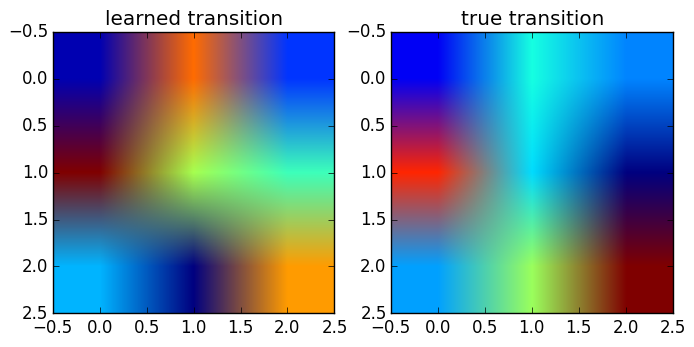

PyObject <matplotlib.image.AxesImage object at 0x1195c4f50>

In [10]:
PyPlot.figure()
ax = PyPlot.subplot(1, 2, 1)
ax[:set_title]("learned transition")
PyPlot.imshow(phghm[hord,hord])
ax = PyPlot.subplot(1, 2, 2)
ax[:set_title]("true transition")
PyPlot.imshow(phghm_true[hord_true,hord_true])

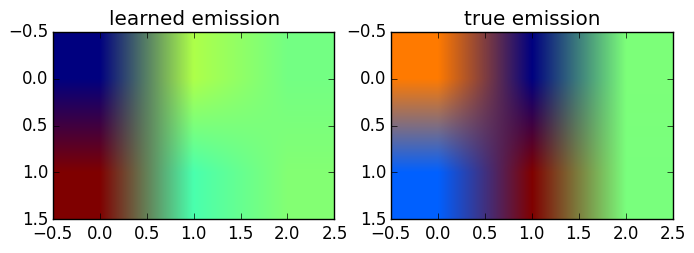

PyObject <matplotlib.image.AxesImage object at 0x11bf09650>

In [11]:
PyPlot.figure()
ax = PyPlot.subplot(1, 2, 1)
ax[:set_title]("learned emission")
PyPlot.imshow(pvgh[:,hord])
ax = PyPlot.subplot(1, 2, 2)
ax[:set_title]("true emission")
PyPlot.imshow(pvgh_true[:,hord_true])

In [12]:
# using PyPlot
# x = linspace(0,10*pi,1000)
# y = exp(-0.1*x).*sin(x)
# plot(x,y)
# using PyCall
# PyDict(pyimport("matplotlib")["rcParams"])["backend"]